# Importing Libraries

In [1]:
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Importing Data 

# Loading Train Data

In [2]:
train_data = pd.read_excel('train.xlsx')
train_data.sample(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Classification
326,3514.157184,141.781688,0.347781,10.808514,1
656,5388.462556,147.720561,0.432384,7.651806,3
678,5369.939137,147.720561,0.428545,7.678200,3
831,5405.927494,147.720561,0.433034,7.627085,3
436,2586.927759,316.546970,0.481961,73.187838,1


In [3]:
print("Unique Dependent values and their counts :")
print(train_data["Classification"].value_counts())

Unique Dependent values and their counts :
1    448
3    339
2     99
Name: Classification, dtype: int64


 Here, label 1 is for malignant, 2 for benign and 3 for normal

# Loading Test Data

In [4]:
test_data = pd.read_excel('test.xlsx')
test_data.sample(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Classification
170,0.264620,0.000000,0.000000,0.000000,3
166,5388.727177,147.720561,0.431212,7.651430,3
46,2793.596189,315.881979,0.387979,67.488996,1
161,5421.010849,147.720561,0.434067,7.605863,3
182,5419.952368,147.720561,0.433495,7.607349,3


In [5]:
print("Unique Dependent values and their counts :")
print(test_data["Classification"].value_counts())

Unique Dependent values and their counts :
1    113
3     88
2     26
Name: Classification, dtype: int64


 Here, label 1 is for malignant, 2 for benign and 3 for normal

# Splitting data for training and testing

# Train Data Split

In [6]:
X_train = train_data.iloc[:,0:3]
y_train = train_data.iloc[:,4]

In [7]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
X_train = pd.DataFrame(standardscaler.fit_transform(X_train))

# Test Data Split

In [8]:
X_test = test_data.iloc[:,0:3]
y_test = test_data.iloc[:,4]

In [9]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
X_test = pd.DataFrame(standardscaler.fit_transform(X_test))

# Machine Learning Models

# Decision Tree

In [10]:
from sklearn import tree
start_time = time.time()
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.0044918060302734375 seconds


In [11]:
y_pred1 = tree.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 60.352422907488986


Classification report : 
               precision    recall  f1-score   support

           1       0.56      1.00      0.72       113
           2       1.00      0.92      0.96        26
           3       0.00      0.00      0.00        88

    accuracy                           0.60       227
   macro avg       0.52      0.64      0.56       227
weighted avg       0.39      0.60      0.47       227

Confusion Matrix : 


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


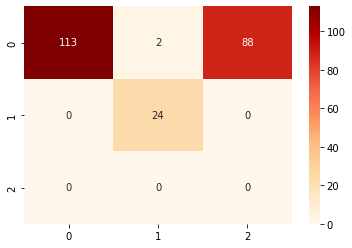

In [13]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [14]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.7841409691629956
MSE: 1.5594713656387664
RMSE: 1.248787958637801


In [15]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.3916364662225212
Recall Score :  0.6035242290748899
f1_score :  0.4659755757541962


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNeighborsClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.00898289680480957 seconds


In [17]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 49.77973568281938


Classification report : 
               precision    recall  f1-score   support

           1       0.56      1.00      0.72       113
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        88

    accuracy                           0.50       227
   macro avg       0.19      0.33      0.24       227
weighted avg       0.28      0.50      0.36       227

Confusion Matrix : 


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


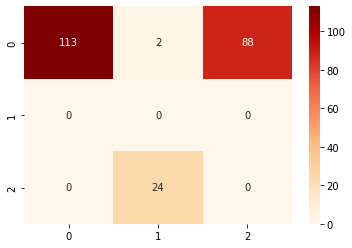

In [19]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [20]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.8898678414096917
MSE: 1.6651982378854626
RMSE: 1.290425603390394


In [21]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.2770990212886005
Recall Score :  0.4977973568281938
f1_score :  0.3560196286176323


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.21062922477722168 seconds


In [23]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 56.82819383259912


Classification report : 
               precision    recall  f1-score   support

           1       0.54      1.00      0.70       113
           2       1.00      0.62      0.76        26
           3       0.00      0.00      0.00        88

    accuracy                           0.57       227
   macro avg       0.51      0.54      0.49       227
weighted avg       0.38      0.57      0.44       227

Confusion Matrix : 


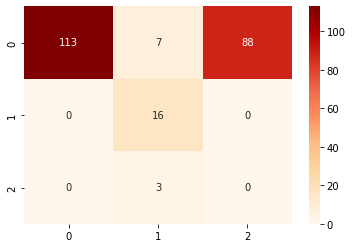

In [25]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.8193832599118943
MSE: 1.5947136563876652
RMSE: 1.2628197244213701


In [27]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.3849754320569298
Recall Score :  0.5682819383259912
f1_score :  0.4377407762479194


# ExtraTreesClassifier

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
start_time = time.time()
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.17018485069274902 seconds


In [29]:
y_pred5 = extratree.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 49.77973568281938


Classification report : 
               precision    recall  f1-score   support

           1       0.50      1.00      0.66       113
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        88

    accuracy                           0.50       227
   macro avg       0.17      0.33      0.22       227
weighted avg       0.25      0.50      0.33       227

Confusion Matrix : 


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


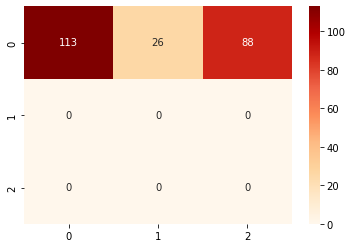

In [31]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.8898678414096917
MSE: 1.6651982378854626
RMSE: 1.290425603390394


In [33]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.24780220846513612
Recall Score :  0.4977973568281938
f1_score :  0.3308888313034465


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost

In [34]:
from xgboost import XGBClassifier
start_time = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7505977153778076 seconds


In [35]:
y_pred4 = xgb.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 50.22026431718062


Classification report : 
               precision    recall  f1-score   support

           1       0.56      1.00      0.72       113
           2       1.00      0.04      0.07        26
           3       0.00      0.00      0.00        88

    accuracy                           0.50       227
   macro avg       0.52      0.35      0.26       227
weighted avg       0.39      0.50      0.36       227

Confusion Matrix : 


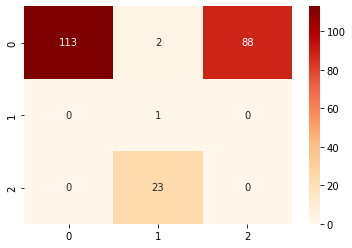

In [37]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.8854625550660793
MSE: 1.6607929515418502
RMSE: 1.2887175608106884


In [39]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.3916364662225212
Recall Score :  0.5022026431718062
f1_score :  0.36450388379792276


# Support Vector Machine

In [40]:
from sklearn import svm
start_time = time.time()
classifier7 = svm.SVC()
classifier7.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.016468524932861328 seconds


In [41]:
y_pred7 = classifier7.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred7)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred7)* 100}")

Accuracy is: 49.77973568281938


Classification report : 
               precision    recall  f1-score   support

           1       0.50      1.00      0.66       113
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        88

    accuracy                           0.50       227
   macro avg       0.17      0.33      0.22       227
weighted avg       0.25      0.50      0.33       227

Confusion Matrix : 


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


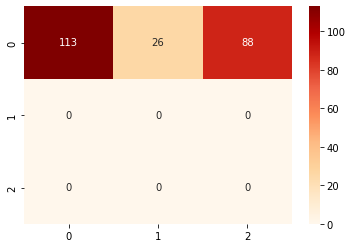

In [43]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred7))

cm = confusion_matrix(y_pred7, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Support Vector Machine

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred7))
print('MSE:', metrics.mean_squared_error(y_test, y_pred7))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred7)))

MAE: 0.8898678414096917
MSE: 1.6651982378854626
RMSE: 1.290425603390394


In [45]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred7, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred7,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred7,average='weighted'))

Precision Score :  0.24780220846513612
Recall Score :  0.4977973568281938
f1_score :  0.3308888313034465


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
classifier6 = LogisticRegression()
classifier6.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.024476289749145508 seconds


In [47]:
y_pred6 = classifier6.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred6)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred6)* 100}")

Accuracy is: 50.66079295154186


Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.98      0.72       113
           2       0.00      0.00      0.00        26
           3       0.13      0.05      0.07        88

    accuracy                           0.51       227
   macro avg       0.23      0.34      0.26       227
weighted avg       0.33      0.51      0.38       227

Confusion Matrix : 


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


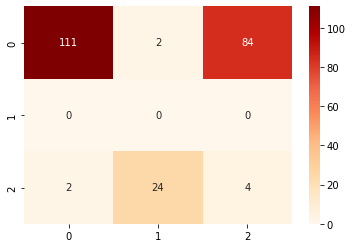

In [49]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred6))

cm = confusion_matrix(y_pred6, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Logistic Regression

In [50]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred6))
print('MSE:', metrics.mean_squared_error(y_test, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

MAE: 0.8722466960352423
MSE: 1.6299559471365639
RMSE: 1.2766972809309824


In [51]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred6, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred6,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred6,average='weighted'))

Precision Score :  0.3321734982147782
Recall Score :  0.5066079295154186
f1_score :  0.38276952572720946


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
